# 1- Problem Statement

Prediction of House Prices in pakistan.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Data Collection

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Entities.csv to Entities.csv


In [ ]:
df=pd.DataFrame(pd.read_csv("Entities.csv"))
df.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [ ]:
df.describe()

,Unnamed: 0,property_id,location_id,price,latitude,longitude,baths,bedrooms,Total_Area
count,168446.000000,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,1.684460e+05
mean,84222.500000,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,1.394239e+04
std,48626.316059,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,8.623647e+05
min,0.000000,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00
25%,42111.250000,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,1.905757e+03
50%,84222.500000,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,4.356016e+03
75%,126333.750000,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,1.197904e+04
max,168445.000000,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,3.387988e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     168446 non-null  int64  
 1   property_id    168446 non-null  int64  
 2   location_id    168446 non-null  int64  
 3   page_url       168446 non-null  object 
 4   property_type  168446 non-null  object 
 5   price          168446 non-null  int64  
 6   location       168446 non-null  object 
 7   city           168446 non-null  object 
 8   province_name  168446 non-null  object 
 9   latitude       168446 non-null  float64
 10  longitude      168446 non-null  float64
 11  baths          168446 non-null  int64  
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Total_Area     168446 non-nul

# 3- Data Wrangling

In [ ]:

df.isnull().sum()

Unnamed: 0           0
property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64

In [ ]:

df=df.drop(['Unnamed: 0','property_id','location_id','page_url','location','date_added','agency','agent'],axis=1)

In [ ]:
df

,property_type,price,city,province_name,latitude,longitude,baths,purpose,bedrooms,Total_Area
0,Flat,10000000,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,1089.004
1,Flat,6900000,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,15246.056
2,House,16500000,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2178.008
3,House,43500000,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,10890.000
4,House,7000000,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2178.008
...,...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Karachi,Sindh,25.029909,67.137192,0,For Sale,6,26136.096
168442,House,12500000,Karachi,Sindh,25.017951,67.136393,0,For Sale,3,2178.008
168443,House,27000000,Karachi,Sindh,25.015384,67.116330,0,For Sale,6,26136.096
168444,House,11000000,Karachi,Sindh,25.013265,67.120818,0,For Sale,3,21235.578


In [ ]:

colors = {'Karachi': 'red', 'Lahore': 'blue', 'Islamabad': 'green',
          'Faisalabad': 'yellow', 'Rawalpindi': 'purple'}


In [ ]:

housesClean = df[['property_type', 'purpose', 'bedrooms',
                        'baths', 'Total_Area', 'city', 'province_name',
                         'latitude', 'longitude', 'price']].rename(
    columns={'Total_Area': 'area', 'property_type': 'type', 'province_name': 'province'})


In [ ]:

housesClean

,type,purpose,bedrooms,baths,area,city,province,latitude,longitude,price
0,Flat,For Sale,2,2,1089.004,Islamabad,Islamabad Capital,33.679890,73.012640,10000000
1,Flat,For Sale,3,3,15246.056,Islamabad,Islamabad Capital,33.700993,72.971492,6900000
2,House,For Sale,5,6,2178.008,Islamabad,Islamabad Capital,33.631486,72.926559,16500000
3,House,For Sale,4,4,10890.000,Islamabad,Islamabad Capital,33.707573,73.151199,43500000
4,House,For Sale,3,3,2178.008,Islamabad,Islamabad Capital,33.492591,73.301339,7000000
...,...,...,...,...,...,...,...,...,...,...
168441,House,For Sale,6,0,26136.096,Karachi,Sindh,25.029909,67.137192,26500000
168442,House,For Sale,3,0,2178.008,Karachi,Sindh,25.017951,67.136393,12500000
168443,House,For Sale,6,0,26136.096,Karachi,Sindh,25.015384,67.116330,27000000
168444,House,For Sale,3,0,21235.578,Karachi,Sindh,25.013265,67.120818,11000000


**Removing Outliers**

In [ ]:

from scipy import stats

In [ ]:
housesClean = housesClean[(
    np.abs(stats.zscore(housesClean['area'])) < 3)]
housesClean = housesClean[(
    np.abs(stats.zscore(housesClean['bedrooms'])) < 3)]
housesClean = housesClean[(
    np.abs(stats.zscore(housesClean['baths'])) < 3)]
housesClean = housesClean[(
    np.abs(stats.zscore(housesClean['price'])) < 3)]


In [ ]:
housesClean

,type,purpose,bedrooms,baths,area,city,province,latitude,longitude,price
0,Flat,For Sale,2,2,1089.004,Islamabad,Islamabad Capital,33.679890,73.012640,10000000
1,Flat,For Sale,3,3,15246.056,Islamabad,Islamabad Capital,33.700993,72.971492,6900000
2,House,For Sale,5,6,2178.008,Islamabad,Islamabad Capital,33.631486,72.926559,16500000
3,House,For Sale,4,4,10890.000,Islamabad,Islamabad Capital,33.707573,73.151199,43500000
4,House,For Sale,3,3,2178.008,Islamabad,Islamabad Capital,33.492591,73.301339,7000000
...,...,...,...,...,...,...,...,...,...,...
168441,House,For Sale,6,0,26136.096,Karachi,Sindh,25.029909,67.137192,26500000
168442,House,For Sale,3,0,2178.008,Karachi,Sindh,25.017951,67.136393,12500000
168443,House,For Sale,6,0,26136.096,Karachi,Sindh,25.015384,67.116330,27000000
168444,House,For Sale,3,0,21235.578,Karachi,Sindh,25.013265,67.120818,11000000


## **Visualization**

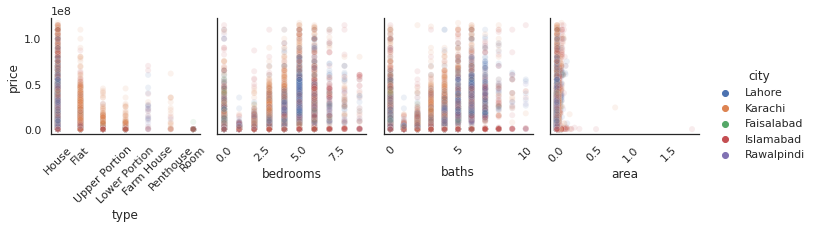

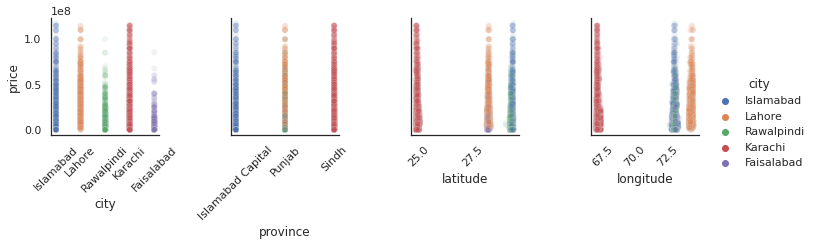

In [ ]:

sns.set(style='white', font_scale=1, color_codes=True)

maxPrice = housesClean['price'].max()
upperY = maxPrice*1.25


pair = sns.pairplot(housesClean.sample(10000),
                    plot_kws={'alpha': 0.1},
                    x_vars=['type', 'bedrooms', 'baths', 'area'],
                    y_vars=['price'],
                    hue='city')
for axis in pair.fig.axes:
    axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
plt.show()


pair = sns.pairplot(housesClean.sample(10000),
                    plot_kws={'alpha': 0.1},
                    x_vars=['city', 'province', 'latitude', 'longitude'],
                    y_vars=['price'],
                    hue='city')
for axis in pair.fig.axes:
    axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
plt.show()


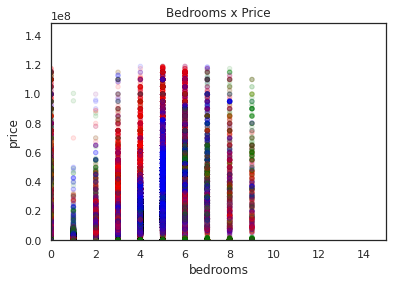

In [ ]:

housesClean.plot(x='bedrooms',
                 y='price',
                 kind='scatter',
                 alpha=.1,
                 c=housesClean['city'].map(colors))
plt.xlim([0, 15])
plt.ylim([0, upperY])
plt.title('Bedrooms x Price')
plt.show()

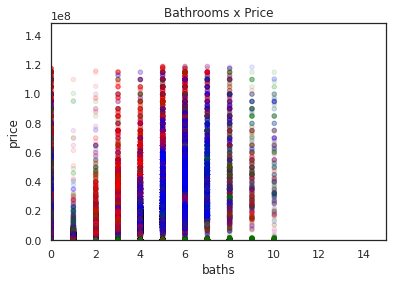

In [ ]:

housesClean.plot(x='baths',
                 y='price',
                 kind='scatter',
                 alpha=.1,
                 c=housesClean['city'].map(colors))
plt.xlim([0, 15])
plt.ylim([0, upperY])
plt.title('Bathrooms x Price')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


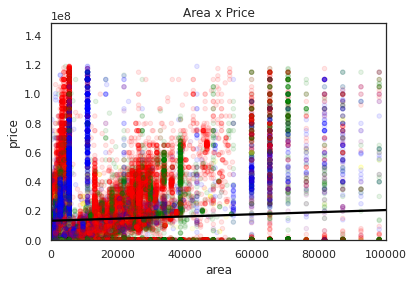

In [ ]:

housesClean.plot(x='area',
                 y='price',
                 kind='scatter',
                 alpha=.1,
                 c=housesClean['city'].map(colors))
plt.xlim([0, 100000])
plt.ylim([0, upperY])
sns.regplot(housesClean.area, housesClean.price, order=1,
            ci=None, scatter=False, color='black')
plt.title('Area x Price')
plt.show()

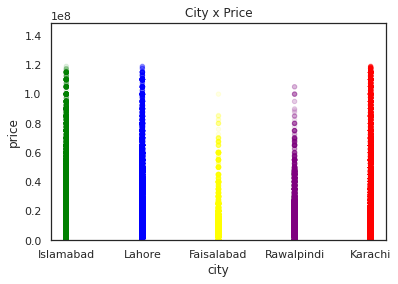

In [ ]:

housesClean.plot(x='city',
                 y='price',
                 kind='scatter',
                 alpha=.1,
                 c=housesClean['city'].map(colors))
plt.ylim([0, upperY])
plt.title('City x Price')
plt.show()

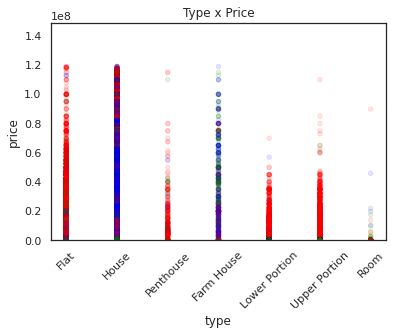

In [ ]:

housesClean.plot(x='type',
                 y='price',
                 kind='scatter',
                 alpha=.1,
                 c=housesClean['city'].map(colors))
plt.ylim([0, upperY])
plt.title('Type x Price')
plt.xticks(rotation=45)
plt.show()


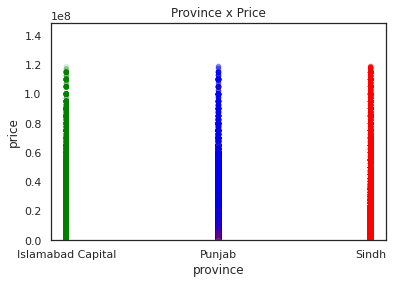

In [ ]:

housesClean.plot(x='province',
                 y='price',
                 kind='scatter',
                 alpha=.1,
                 c=housesClean['city'].map(colors))
plt.ylim([0, upperY])
plt.title('Province x Price')
plt.show()

**Categorical Columns**

In [ ]:
housesClean = pd.get_dummies(
    data=housesClean, drop_first=True).rename(
    columns={'type_Lower Portion': 'type_Lower_Portion',
             'type_Upper Portion': 'type_Upper_Portion',
             'purpose_For Sale': 'purpose_For_Sale'})

print(housesClean)

        bedrooms  baths       area   latitude  longitude     price  type_Flat  \
0              2      2   1089.004  33.679890  73.012640  10000000          1   
1              3      3  15246.056  33.700993  72.971492   6900000          1   
2              5      6   2178.008  33.631486  72.926559  16500000          0   
3              4      4  10890.000  33.707573  73.151199  43500000          0   
4              3      3   2178.008  33.492591  73.301339   7000000          0   
...          ...    ...        ...        ...        ...       ...        ...   
168441         6      0  26136.096  25.029909  67.137192  26500000          0   
168442         3      0   2178.008  25.017951  67.136393  12500000          0   
168443         6      0  26136.096  25.015384  67.116330  27000000          0   
168444         3      0  21235.578  25.013265  67.120818  11000000          0   
168445         3      3  25591.594  25.113565  67.353811   9000000          0   

        type_House  type_Lo

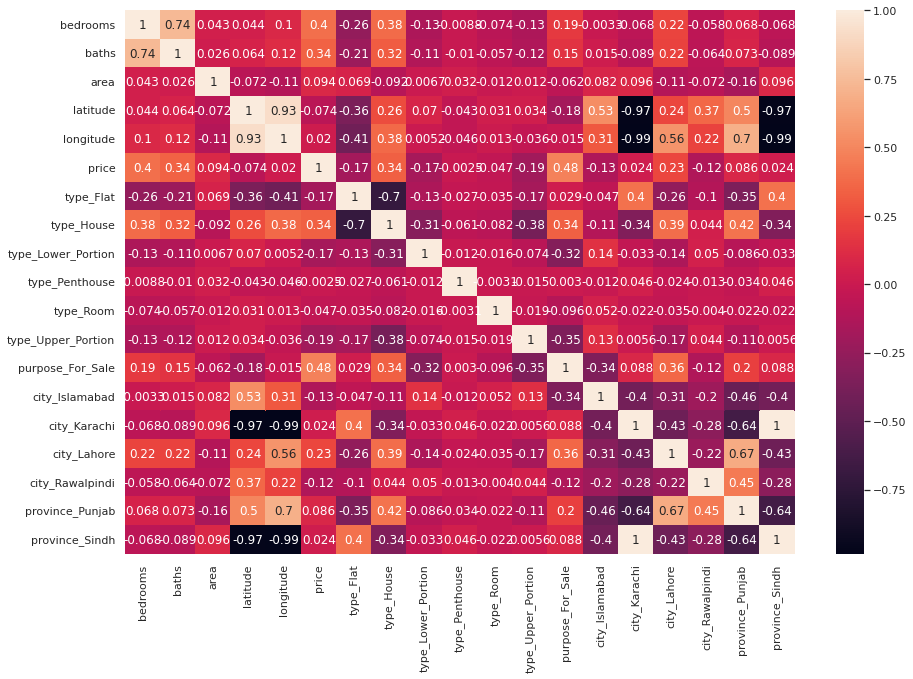

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(housesClean.corr(), annot=True)
plt.show()

# 5- Transformation and

# 6- Machine Learning Modeling

In [ ]:

import sklearn.linear_model as linMod
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:

X = housesClean.drop(columns='price')
y = housesClean['price']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2)

**Linear Regression**

In [ ]:
print("Multiple Linear Regression")
linRegress = linMod.LinearRegression()
linRegress.fit(Xtrain, ytrain)

print("Linear R2:", r2_score(ytest, linRegress.predict(Xtest)))

Multiple Linear Regression
Linear R2: 0.3649906385501057


**Decision Trees Methods**

In [ ]:
treeRegress = DecisionTreeRegressor()
treeRegress.fit(Xtrain, ytrain)

print("Decision Tree R2:", r2_score(ytest, treeRegress.predict(Xtest)))

Decision Tree R2: 0.8911946393818908


**Random Forest Regression**

In [ ]:
RFRegress = RandomForestRegressor()
RFRegress.fit(Xtrain, ytrain)

print("Random Forest R2:", r2_score(ytest, RFRegress.predict(Xtest)))

Random Forest R2: 0.9245864878870699


# 7- Model Evaluation

Decision tree accomplished 0.894 accuracy score.which it is perfect and we think we can consider it a successful classification. Multiple Linear Regression accuracy score is 0.363, Random Forest accuracy score is 0.926.